In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("PCOS_infertility.csv")

In [5]:
data.shape

(541, 6)

In [7]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [9]:
data.describe() 

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518
std,156.317519,156.317519,0.469615,3348.920576,1603.826221
min,1.000000,10001.000000,0.000000,1.300000,0.110417
25%,136.000000,10136.000000,0.000000,1.990000,1.990000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000


In [11]:
#Categorical Features
cat_features = data.select_dtypes(include=['object','bool']).columns.tolist()
cat_features

['AMH(ng/mL)']

In [13]:
data2=data.copy()

In [15]:
data2.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

# Créer un objet LabelEncoder
label_encoder = LabelEncoder()

data2['AMH(ng/mL)_encoded'] = label_encoder.fit_transform(data2['AMH(ng/mL)'])

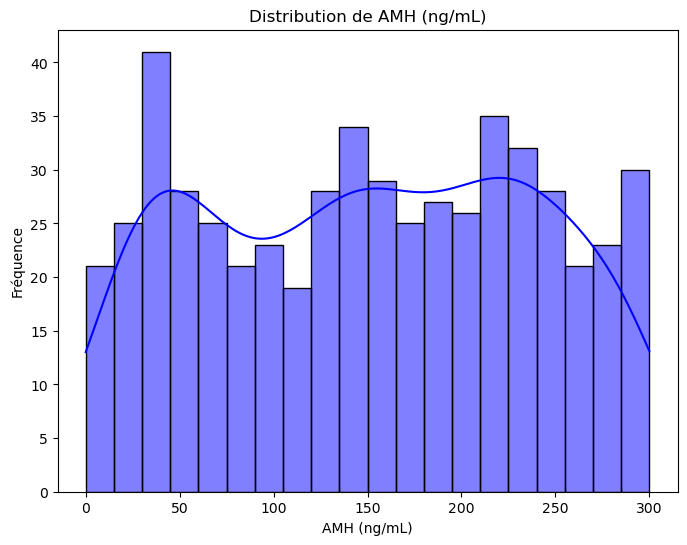

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme de AMH
plt.figure(figsize=(8, 6))
sns.histplot(data2['AMH(ng/mL)_encoded'], kde=True, bins=20, color='blue')
plt.title('Distribution de AMH (ng/mL)')
plt.xlabel('AMH (ng/mL)')
plt.ylabel('Fréquence')
plt.show()

<ipython-input-16-8843ad66bf75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS (Y/N)', y='AMH(ng/mL)_encoded', data=data2, palette='Set2')


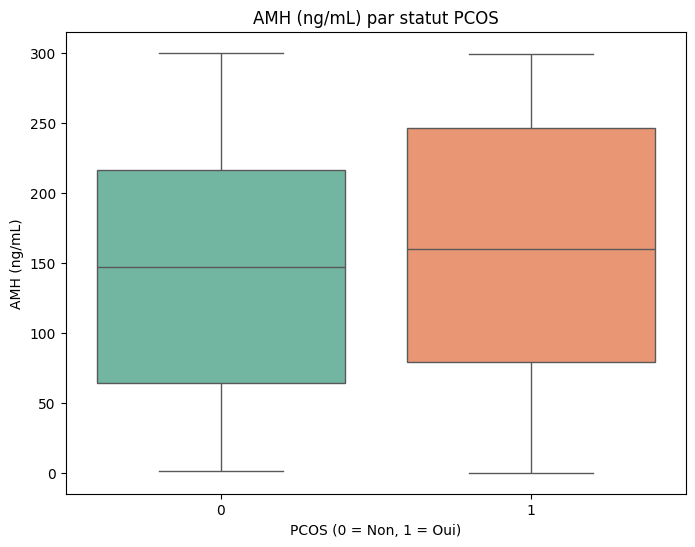

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PCOS (Y/N)', y='AMH(ng/mL)_encoded', data=data2, palette='Set2')
plt.title('AMH (ng/mL) par statut PCOS')
plt.xlabel('PCOS (0 = Non, 1 = Oui)')
plt.ylabel('AMH (ng/mL)')
plt.show()

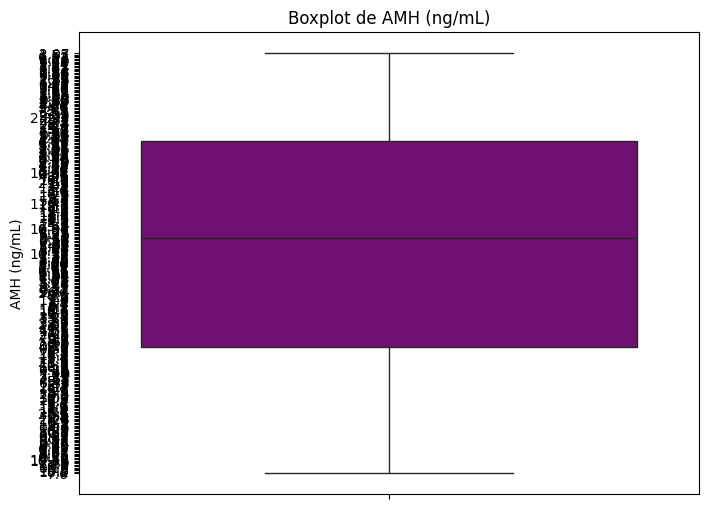

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data2['AMH(ng/mL)'], color='purple')
plt.title('Boxplot de AMH (ng/mL)')
plt.ylabel('AMH (ng/mL)')
plt.show()

Colonnes disponibles après nettoyage : ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'AMH(ng/mL)_encoded']


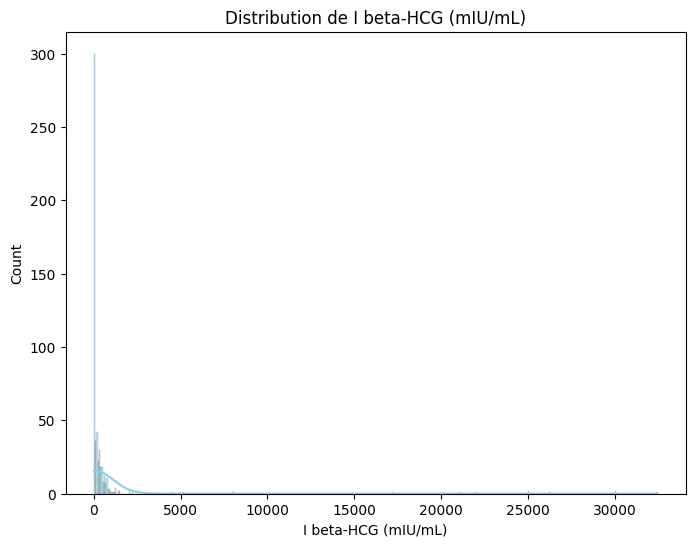

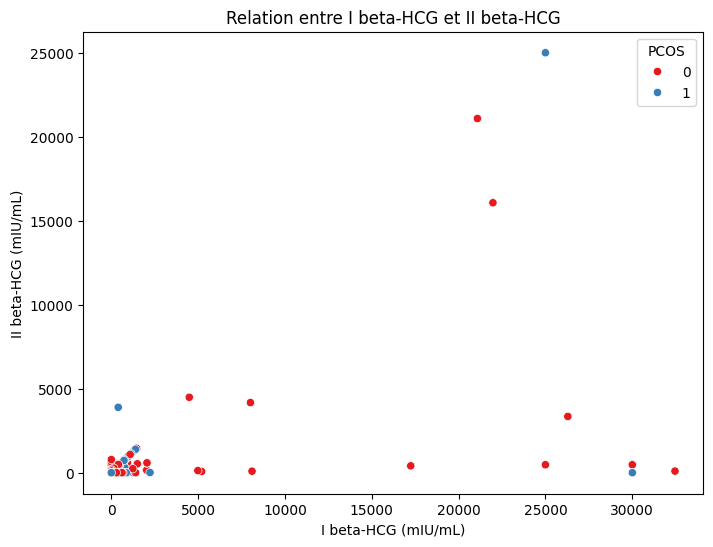

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppression des espaces multiples dans les noms des colonnes
data2.columns = data2.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Vérification des noms des colonnes après nettoyage
print("Colonnes disponibles après nettoyage :", data2.columns.tolist())

# Visualisation : Distribution des niveaux de I beta-HCG
plt.figure(figsize=(8, 6))
sns.histplot(data=data2, x='I beta-HCG(mIU/mL)', kde=True, color='skyblue')
plt.title('Distribution de I beta-HCG (mIU/mL)')
plt.xlabel('I beta-HCG (mIU/mL)')
plt.show()

# Visualisation de la relation entre I et II beta-HCG
plt.figure(figsize=(8, 6))
sns.scatterplot(x='I beta-HCG(mIU/mL)', y='II beta-HCG(mIU/mL)',
                data=data2, hue='PCOS (Y/N)', palette='Set1')
plt.title('Relation entre I beta-HCG et II beta-HCG')
plt.xlabel('I beta-HCG (mIU/mL)')
plt.ylabel('II beta-HCG (mIU/mL)')
plt.legend(title='PCOS')
plt.show()
